## Table of Contents[](http://)

1. Overview of Data
2. Missing Value Imputation
3. EDA
4. Feature Engineering
5. Feature Selection

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from matplotlib import rcParams
import sklearn.linear_model
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

## 1. Overview of Data

In [3]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.info()
# Age, Cabin, Embarked has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

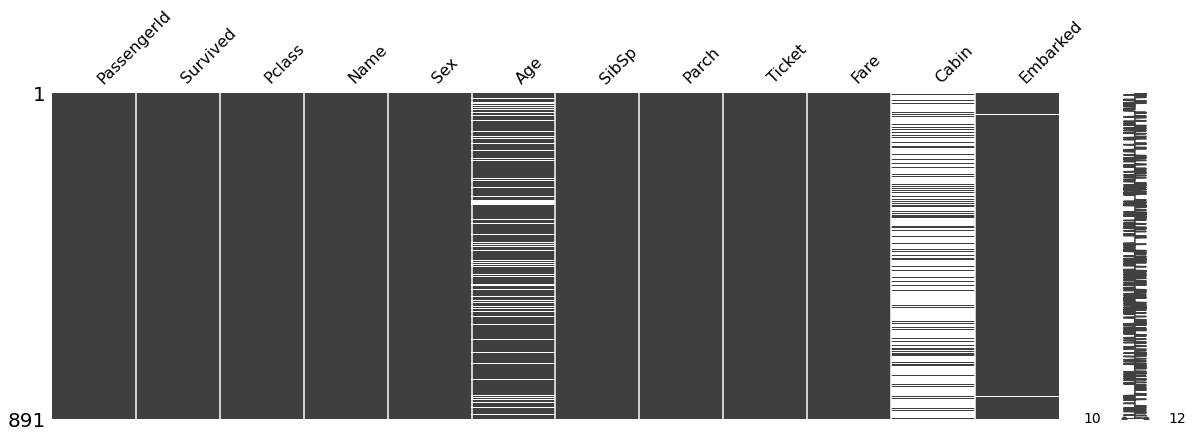

In [9]:
mno.matrix(train_df, figsize = (20, 6))  # Visualizing the missingness

In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## 2. Missing Value Imputation

### 2.1 Data Preparing

In [12]:
train_df_2, train_df_3 = pd.read_csv('../input/titanic/train.csv'), pd.read_csv('../input/titanic/train.csv')
test_df_2, test_df_3 = pd.read_csv('../input/titanic/test.csv'), pd.read_csv('../input/titanic/test.csv')

### 2.2 Method 1: use mean value, NaN, String to fill

In [13]:
# Missing value in Age
# Training Data

Gend_male = pd.DataFrame(train_df[train_df["Sex"] == "male"])
mean_age_male = Gend_male['Age'].mean()

Gend_female = pd.DataFrame(train_df[train_df["Sex"] == "female"])
mean_age_female = Gend_female['Age'].mean()

train_df.loc[(train_df['Age'].isna()) & (train_df['Sex'] == 'male'), 'Age'] = mean_age_male
train_df.loc[(train_df['Age'].isna()) & (train_df['Sex'] == 'female'), 'Age'] = mean_age_female

# Testing Data

Gend_male_test = pd.DataFrame(test_df[test_df["Sex"] == "male"])
mean_age_male_test = Gend_male_test['Age'].mean()

Gend_female_test = pd.DataFrame(test_df[test_df["Sex"] == "female"])
mean_age_female_test = Gend_female_test['Age'].mean()

test_df.loc[(test_df['Age'].isna()) & (test_df['Sex'] == 'male'), 'Age'] = mean_age_male
test_df.loc[(test_df['Age'].isna()) & (test_df['Sex'] == 'female'), 'Age'] = mean_age_female

In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Missing value in Cabin
train_df['Cabin'].fillna('NaN',inplace = True)
test_df['Cabin'].fillna('NaN',inplace = True)

In [16]:
# Missing value in Embarked
train_df['Embarked'].fillna('Unknown',inplace = True)

In [17]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 2.3 Method 2: filling missing values use SLR, need one-hot emcoding

In [18]:
# Missing value in Cabin
train_df_2['Cabin'].fillna('NaN', inplace = True)
test_df_2['Cabin'].fillna('NaN', inplace = True)

# Missing value in Embarked
train_df_2['Embarked'].fillna('Unknown', inplace = True)
test_df_2['Embarked'].fillna('Unknown', inplace = True)

In [19]:
X_concat = pd.concat([train_df_2.loc[:, train_df_2.columns != 'Survived'], test_df_2])
X_concat.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         0
dtype: int64

In [20]:
# one-hot encoding
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X_concat = pd.get_dummies(X_concat[features])
X_concat.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown
0,3,22.0,1,0,7.2500,0,1,0,0,1,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,1,0
4,3,35.0,0,0,8.0500,0,1,0,0,1,0


In [21]:
missing_columns = ["Age", "Fare"]

In [22]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [23]:
for feature in missing_columns:
    X_concat[feature + '_imp'] = X_concat[feature]
    X_concat = random_imputation(X_concat, feature)
    
X_concat.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_Unknown,Age_imp,Fare_imp
0,3,22.0,1,0,7.2500,0,1,0,0,1,0,22.0,7.2500
1,1,38.0,1,0,71.2833,1,0,1,0,0,0,38.0,71.2833
2,3,26.0,0,0,7.9250,1,0,0,0,1,0,26.0,7.9250
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,35.0,53.1000
4,3,35.0,0,0,8.0500,0,1,0,0,1,0,35.0,8.0500


In [24]:
### Method 1. No Random Effect
# deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

# for feature in missing_columns:
        
#     deter_data["Det" + feature] = df[feature + "_imp"]
#     parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})
    
#     #Create a Linear Regression model to estimate the missing data
#     model = linear_model.LinearRegression()
#     model.fit(X = df[parameters], y = df[feature + '_imp'])
    
#     #observe that I preserve the index of the missing data from the original dataframe
#     deter_data.loc[df[feature].isnull(), "Det" + feature] = model.predict(df[parameters])[df[feature].isnull()]

In [25]:
### Method 2. Random Effect
random_data = pd.DataFrame(columns = ["Ran" + name for name in missing_columns])

for feature in missing_columns:
        
    random_data["Ran" + feature] = X_concat[feature + '_imp']
    parameters = list(set(X_concat.columns) - set(missing_columns) - {feature + '_imp'})
    
    model = linear_model.LinearRegression()
    model.fit(X = X_concat[parameters], y = X_concat[feature + '_imp'])
    
    # Standard Error of the regression estimates is equal to std() of the errors of each estimates
    predict = model.predict(X_concat[parameters])
    std_error = (predict[X_concat[feature].notnull()] - X_concat.loc[X_concat[feature].notnull(), feature + '_imp']).std()
    
    # observe that I preserve the index of the missing data from the original dataframe
    random_predict = np.random.normal(size = X_concat[feature].shape[0], 
                                      loc = predict, 
                                      scale = std_error)
    random_data.loc[(X_concat[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(X_concat[feature].isnull()) & (random_predict > 0)]



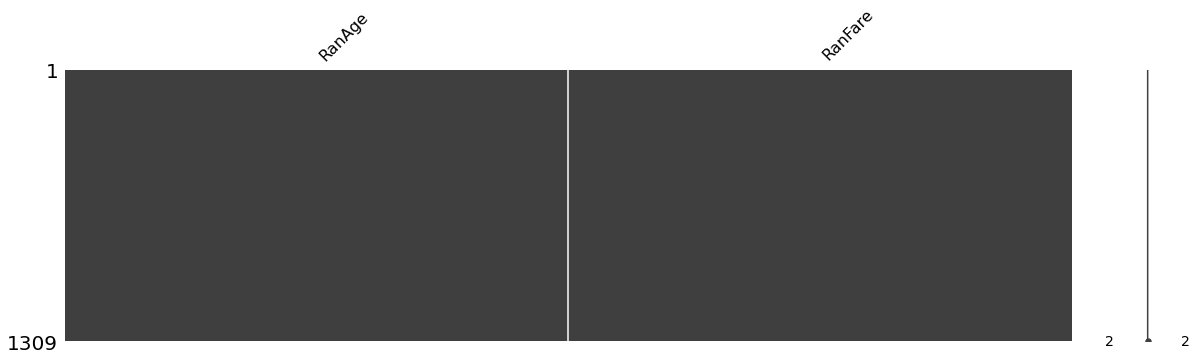

In [26]:
mno.matrix(random_data, figsize = (20,5))

In [27]:
train_df_2["Age"] = random_data["RanAge"][:891]
test_df_2["Age"] = random_data["RanAge"][891:]
test_df_2["Fare"] = random_data["RanFare"][891:]

In [28]:
train_df_2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [29]:
test_df_2.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 2.4 Method 3: Data scaling (age and fear) and use zero to fill (typically for NN)

In [30]:
scaler = MinMaxScaler(feature_range = (1, 2))
train_df_3["Fare"] = scaler.fit_transform(pd.DataFrame(train_df_3["Fare"]))
train_df_3["Age"] = scaler.fit_transform(pd.DataFrame(train_df_3["Age"]))
test_df_3["Fare"] = scaler.fit_transform(pd.DataFrame(test_df_3["Fare"]))
test_df_3["Age"] = scaler.fit_transform(pd.DataFrame(test_df_3["Age"]))

In [31]:
train_df_3.fillna(0, inplace = True)
test_df_3.fillna(0, inplace = True)

In [32]:
train_df_3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [33]:
test_df_3.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## 3. EDA

In [34]:
# Total number of survived and non-survived
# Print out data in Pandas df format

from pandas.core.frame import DataFrame

a = DataFrame(train_df.groupby(['Survived'])['Sex'].count())
a.rename(columns={'Sex':'Count'}, inplace = True)
a.T

Survived,0,1
Count,549,342


### Plot with Sorted data

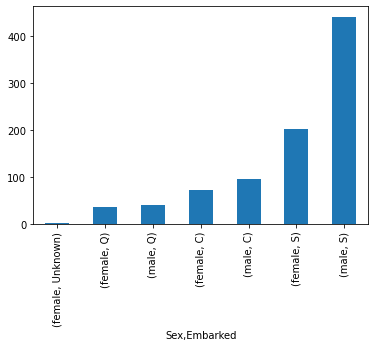

In [35]:
train_df.groupby(['Sex','Embarked'])['Survived'].count().sort_values().plot(kind = "bar", figsize = (6,4))

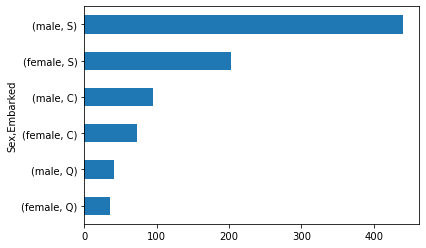

In [36]:
train_df[train_df.Embarked != 'Unknown'].groupby(['Sex','Embarked'])['Survived'].count().sort_values().plot(kind = "barh")

### Stacked Plot

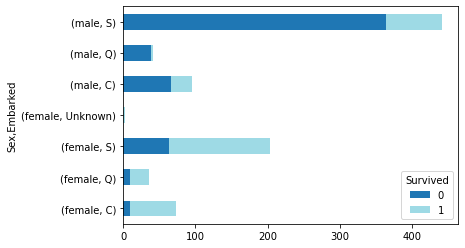

In [37]:
# female / Embark C have a larger survival rate
cmp = plt.cm.get_cmap('tab20')
train_df.groupby(['Sex','Embarked','Survived']).size().unstack().plot(kind = "barh", stacked = True, cmap = cmp)

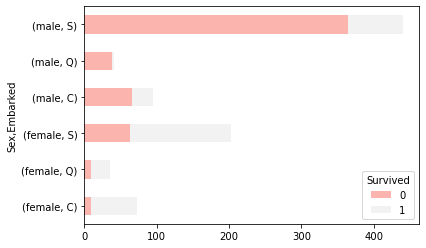

In [38]:
# female / Embark C have a larger survival rate
cmp = plt.cm.get_cmap('Pastel1')
train_df[train_df.Embarked != 'Unknown'].groupby(['Sex','Embarked','Survived']).size().unstack().plot(kind = "barh", stacked = True, cmap = cmp)

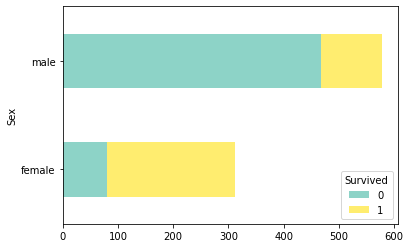

In [39]:
# female have a larger survival rate
cmp = plt.cm.get_cmap('Set3')
train_df[train_df.Embarked != 'Unknown'].groupby(['Sex','Survived']).size().unstack().plot(kind = "barh", stacked = True, cmap = cmp)

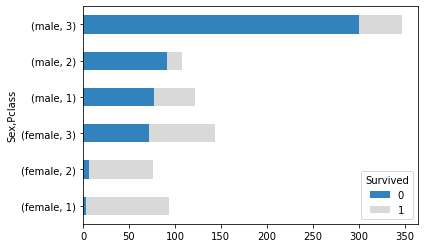

In [40]:
# female / Class 1 have a larger survival rate
cmp = plt.cm.get_cmap('tab20c')
train_df.groupby(['Sex','Pclass','Survived']).size().unstack().plot(kind = "barh", stacked = True, cmap = cmp)

### Stacked Plot with Sorted data

In [41]:
s_sort = train_df.groupby(['Sex','Embarked'])['Survived'].count().sort_values(ascending = False)
s_sort

Sex     Embarked
male    S           441
female  S           203
male    C            95
female  C            73
male    Q            41
female  Q            36
        Unknown       2
Name: Survived, dtype: int64

In [42]:
s_sort.index

MultiIndex([(  'male',       'S'),
            ('female',       'S'),
            (  'male',       'C'),
            ('female',       'C'),
            (  'male',       'Q'),
            ('female',       'Q'),
            ('female', 'Unknown')],
           names=['Sex', 'Embarked'])

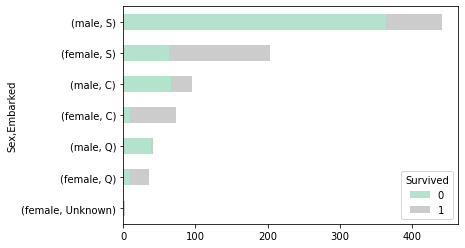

In [43]:
# female / Embark C have a larger survival rate
cmp = plt.cm.get_cmap('Pastel2')
order = s_sort.index[::-1]
train_df.groupby(['Sex','Embarked','Survived']).size().unstack().loc[order].plot(kind = "barh", stacked = True, cmap = cmp)

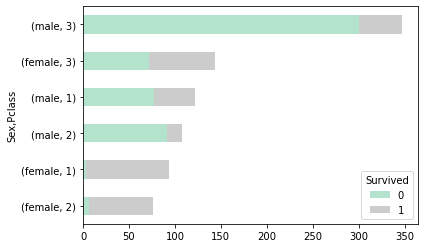

In [44]:
# female / Class 1 have a larger survival rate
s_sort = train_df.groupby(['Sex','Pclass'])['Survived'].count().sort_values()
cmp = plt.cm.get_cmap('Pastel2')
order = s_sort.index
train_df.groupby(['Sex','Pclass','Survived']).size().unstack().loc[order].plot(kind = "barh", stacked = True, cmap = cmp)

### Pie chart

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fca44b410>,
      dtype=object)

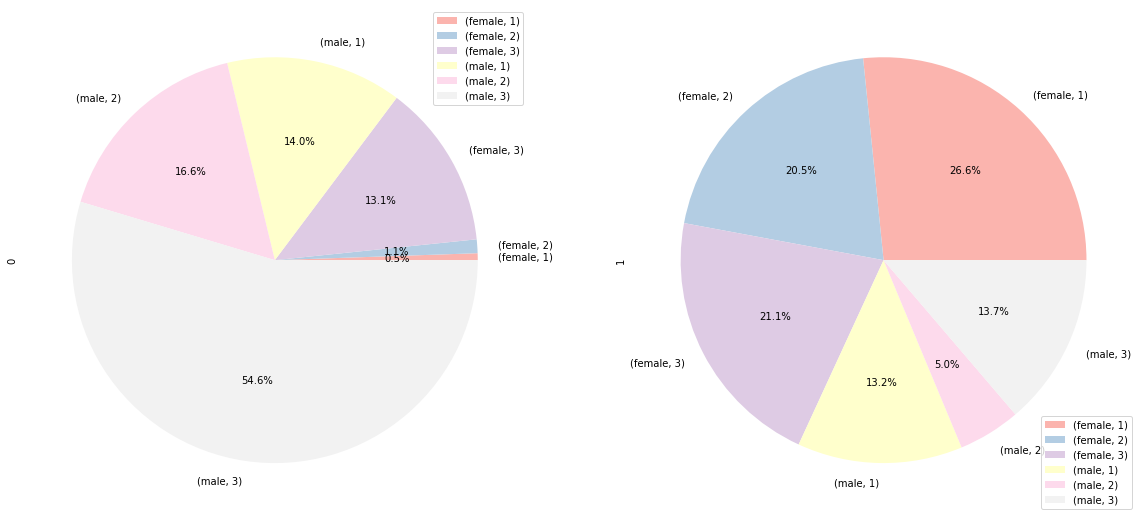

In [45]:
# Left: non-survive, right: survive
# female / class 1 have a larger survival rate
cmp = plt.cm.get_cmap('Pastel1')
train_df.groupby(['Sex','Pclass','Survived']).size().unstack().plot(subplots = True, kind = "pie", figsize = (20,20), stacked = True, autopct='%1.1f%%',cmap = cmp,shadow = False)

### Unstacked Plot

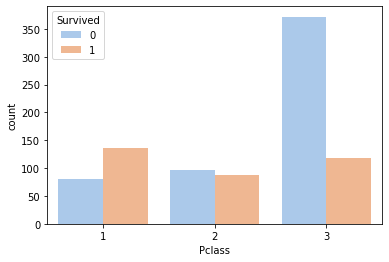

In [46]:
# Classs 1 has higher index of fare are more likely to survive
ax = sns.countplot(x = 'Pclass', hue = 'Survived', data = train_df, palette = sns.color_palette("pastel"))

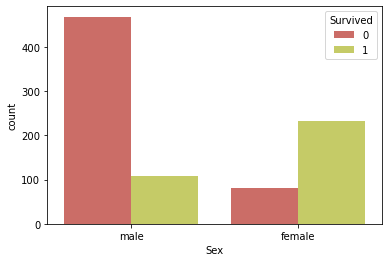

In [47]:
# Female have higher index of fare are more likely to survive
ax = sns.countplot(x = 'Sex', hue = 'Survived', data = train_df, palette = sns.color_palette("hls"))

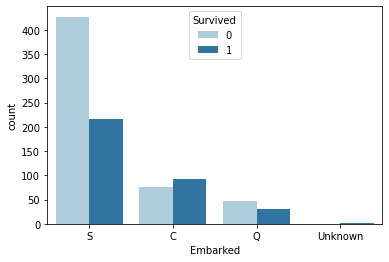

In [48]:
# Embark C has higher index of fare are more likely to survive
ax = sns.countplot(x = 'Embarked', hue = 'Survived', data = train_df, palette = sns.color_palette("Paired"))

In [49]:
ageBins = [0, 17, 25, 35, 55, 100]
fareBins = [0, 10, 20, 30, 40, 51, 512]
train_df['AgeCat'] = pd.cut(train_df['Age'], ageBins)
train_df['FareCat'] = pd.cut(train_df['Fare'], fareBins)

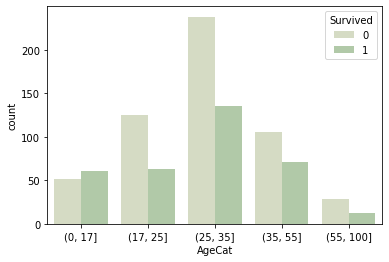

In [50]:
# Youth under 17 have higher index of fare are more likely to survive
ax = sns.countplot(x = 'AgeCat', hue = 'Survived', data = train_df, palette = sns.cubehelix_palette(8, start=.5, rot=-.75))

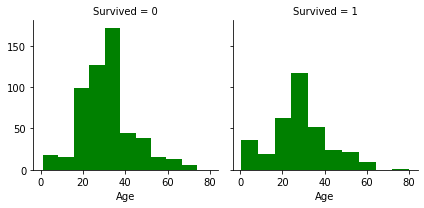

In [51]:
ax = sns.FacetGrid(train_df, col = "Survived")
ax = ax.map(plt.hist, 'Age', color = "g", bins = 10)

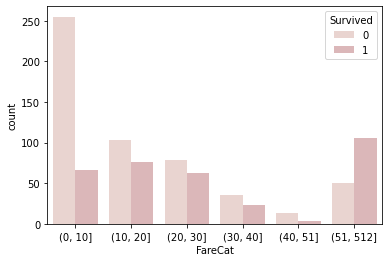

In [52]:
ax = sns.countplot(x = 'FareCat', hue = 'Survived', data = train_df, palette = sns.cubehelix_palette(8))

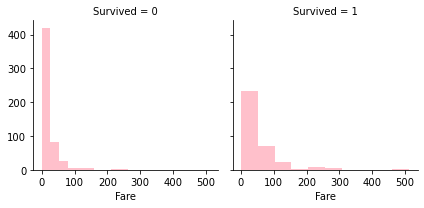

In [53]:
ax = sns.FacetGrid(train_df, col = "Survived")
ax = ax.map(plt.hist, 'Fare', color = "pink", bins = 10)

### 2D Density Plot

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'Label'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


Text(0.5, 1.0, 'Density distribution of Pclass and Age')

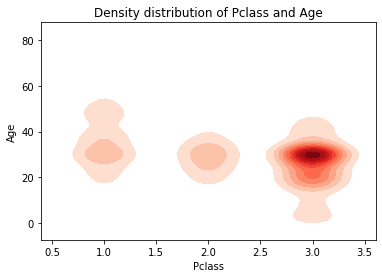

In [54]:
sns.kdeplot(train_df['Pclass'], train_df['Age'], 
            color = '', shade = True, Label = '', 
            cmap = "Reds", shade_lowest = False).set_title('Density distribution of Pclass and Age')

Text(0.5, 1.0, 'Density distribution of sex and Pclass')

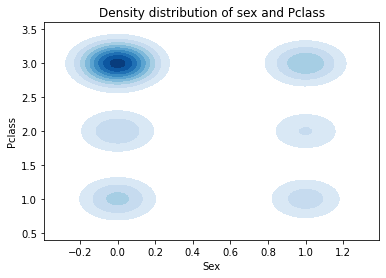

In [55]:
a = train_df.copy()
a['Sex'].replace(['male','female'],[0,1], inplace = True)

sns.kdeplot(a['Sex'], train_df['Pclass'], 
            color = '', shade = True, Label = '', 
            cmap = "Blues", shade_lowest = False).set_title('Density distribution of sex and Pclass')

Text(0.5, 1.0, 'Density distribution of Sex and Age')

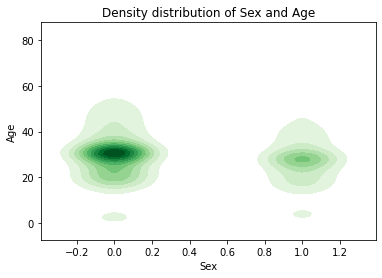

In [56]:
sns.kdeplot(a['Sex'], train_df['Age'], 
            color = '', shade = True, Label = '', 
            cmap = "Greens", shade_lowest = False).set_title('Density distribution of Sex and Age')

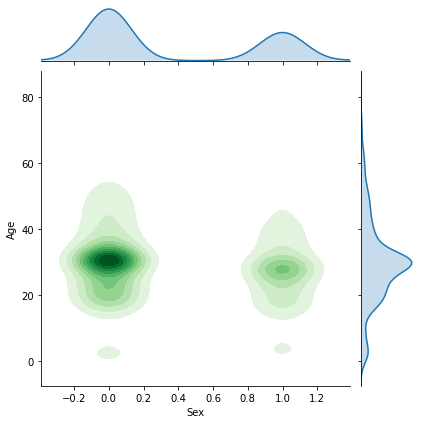

In [57]:
sns.jointplot(a['Sex'], train_df['Age'], kind = 'kde',
            shade = True, 
            cmap = "Greens", shade_lowest = False)

### 1D Density Plot

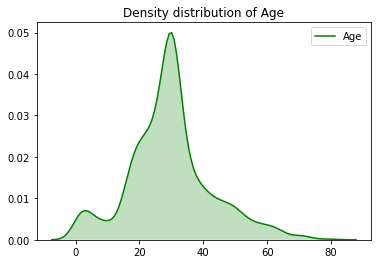

In [58]:
ax = sns.kdeplot(train_df['Age'], shade = True, color="g").set_title('Density distribution of Age')

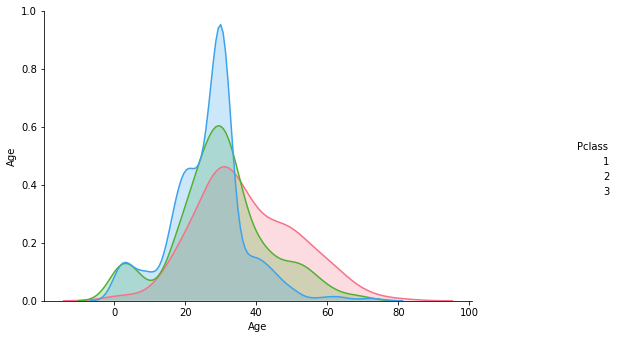

In [59]:
g_1 = sns.pairplot(train_df[["Age", "Pclass"]], hue = "Pclass", palette = "husl")
g_1.fig.set_size_inches(10,5)

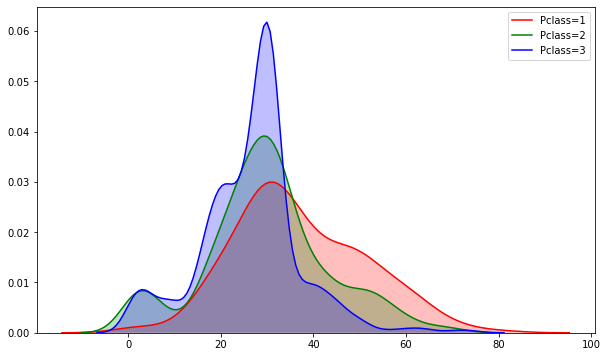

In [60]:
# Percentage of elder people in class 1 is larger than others
plt.figure(figsize = (10,6))
P1 = train_df.loc[train_df['Pclass'] == 1]
P2 = train_df.loc[train_df['Pclass'] == 2]
P3 = train_df.loc[train_df['Pclass'] == 3]
ax = sns.kdeplot(P1['Age'], shade = True, color = "r", label ="Pclass=1")
ax = sns.kdeplot(P2['Age'], color = "g", shade = True, label ="Pclass=2")
ax = sns.kdeplot(P3['Age'], color = "b", shade = True, label ="Pclass=3")
ax.grid(False)

### Paired plot

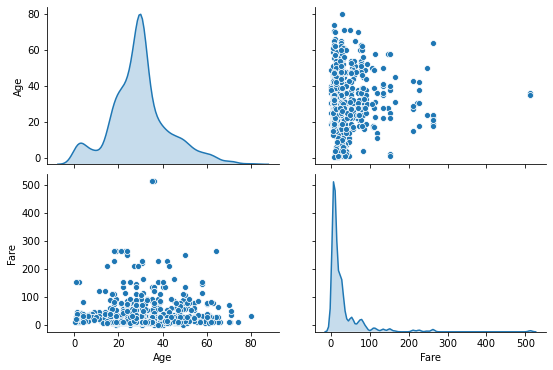

In [61]:
g = sns.pairplot(train_df, vars = ["Age", "Fare"], diag_kind = "kde")
g.fig.set_size_inches(8,5)

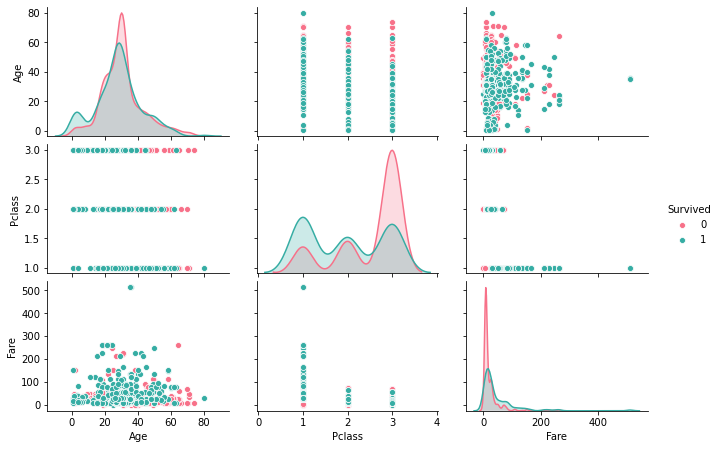

In [62]:
g_1 = sns.pairplot(train_df[["Survived", "Age", "Pclass", "Fare"]], hue = "Survived", palette = "husl")
g_1.fig.set_size_inches(10,6)

### Scatter Plot

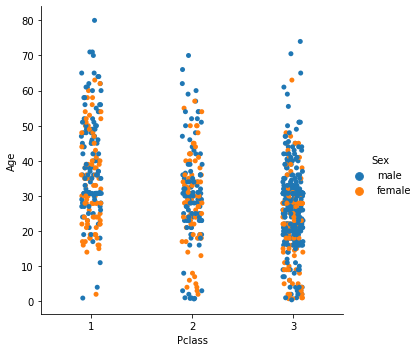

In [63]:
# Categorize by Age bins, PClass and Sex
sns.catplot(x = "Pclass", y = "Age", hue = "Sex", data = train_df)

### Box Plot

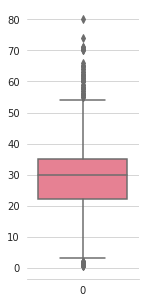

In [64]:
plt.figure(figsize = (2,5))

sns.set_style("whitegrid")
sns.boxplot(data = train_df["Age"], palette = "husl")
sns.despine(left = True)

plt.show()

### Could skip: manually coding the process above

In [65]:
# Total Number of survived and not survived in the training set
Survival_rate = {'Survived_count': [0],
                'Not_Survived_count' : [0],
                'Total' : [0]}

Survival_rate['Survived_count'] =  train_df.Survived.value_counts()[0]
Survival_rate['Not_Survived_count'] =  train_df.Survived.value_counts()[1]
Survival_rate['Total'] =  Survival_rate['Survived_count'] + Survival_rate['Not_Survived_count']

# Create the index 
index_ = ['Survival'] 
  
# Set the index 
Survival = pd.DataFrame([Survival_rate])
Survival.index = index_ 
Survival.transpose()

,Survival
Survived_count,549
Not_Survived_count,342
Total,891


In [66]:
# Survived and Not Survived by Age and Embarked
# did count in Embarked = unkown (2)
s_count = {'Not_Survived':[0],
          'Survived':[0]}
sf_count = {'Not_Survived':[0],
          'Survived':[0]}
c_count = {'Not_Survived':[0],
          'Survived':[0]}
cf_count = {'Not_Survived':[0],
          'Survived':[0]}
q_count = {'Not_Survived':[0],
          'Survived':[0]}
qf_count = {'Not_Survived':[0],
          'Survived':[0]}

s_count['Not_Survived'] = train_df.loc[(train_df['Sex'] == 'male') & (train_df['Embarked'] == 'S'),'Survived'].value_counts()[0]
s_count['Survived'] = train_df.loc[(train_df['Sex'] == 'male') & (train_df['Embarked'] == 'S'),'Survived'].value_counts()[1]
# Create the index 
index_ = ['Male passengers : Embarked S'] 
# Set the index 
male_S = pd.DataFrame([s_count])
male_S.index = index_ 
#male_S.transpose()
#male_S

sf_count['Not_Survived'] = train_df.loc[(train_df['Sex'] == 'female') & (train_df['Embarked'] == 'S'),'Survived'].value_counts()[0]
sf_count['Survived'] = train_df.loc[(train_df['Sex'] == 'female') & (train_df['Embarked'] == 'S'),'Survived'].value_counts()[1]
# Create the index 
index_ = ['Female passengers : Embarked S'] 
# Set the index 
female_S = pd.DataFrame([sf_count])
female_S.index = index_

c_count['Not_Survived'] = train_df.loc[(train_df['Sex']=='male') & (train_df['Embarked']=='C'),'Survived'].value_counts()[0]
c_count['Survived'] = train_df.loc[(train_df['Sex']=='male') & (train_df['Embarked']=='C'),'Survived'].value_counts()[1]
# Create the index 
index_ = ['Male passengers : Embarked C'] 
# Set the index 
male_C=pd.DataFrame([c_count])
male_C.index = index_ 
# male_C

cf_count['Not_Survived'] = train_df.loc[(train_df['Sex']=='female') & (train_df['Embarked']=='C'),'Survived'].value_counts()[0]
cf_count['Survived'] = train_df.loc[(train_df['Sex']=='female') & (train_df['Embarked']=='C'),'Survived'].value_counts()[1]
# Create the index 
index_ = ['Female passengers : Embarked C'] 
# Set the index 
female_C=pd.DataFrame([cf_count])
female_C.index = index_ 

q_count['Not_Survived'] = train_df.loc[(train_df['Sex']=='male') & (train_df['Embarked']=='Q'),'Survived'].value_counts()[0]
q_count['Survived'] = train_df.loc[(train_df['Sex']=='male') & (train_df['Embarked']=='Q'),'Survived'].value_counts()[1]
# Create the index 
index_ = ['Male passengers : Embarked Q'] 
# Set the index 
male_Q=pd.DataFrame([q_count])
male_Q.index = index_ 
#male_Q

qf_count['Not_Survived'] = train_df.loc[(train_df['Sex']=='female') & (train_df['Embarked']=='Q'),'Survived'].value_counts()[0]
qf_count['Survived'] = train_df.loc[(train_df['Sex']=='female') & (train_df['Embarked']=='Q'),'Survived'].value_counts()[1]
# Create the index 
index_ = ['female passengers : Embarked Q'] 
# Set the index 
female_Q=pd.DataFrame([qf_count])
female_Q.index = index_ 


frames = [male_S, female_S, male_C, female_C, male_Q, female_Q]
result = pd.concat(frames)
Gender_Embarked = pd.DataFrame(result)
Gender_Embarked

,Not_Survived,Survived
Male passengers : Embarked S,364,77
Female passengers : Embarked S,63,140
Male passengers : Embarked C,66,29
Female passengers : Embarked C,9,64
Male passengers : Embarked Q,38,3
female passengers : Embarked Q,9,27


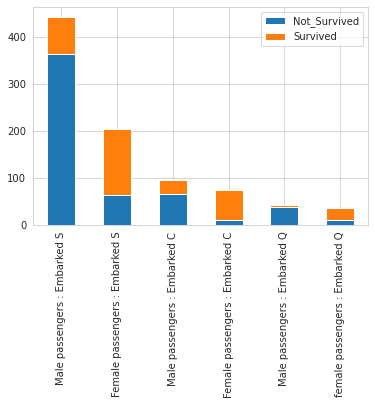

In [67]:
Gender_Embarked[["Not_Survived","Survived"]].plot(kind = "bar", stacked = True)

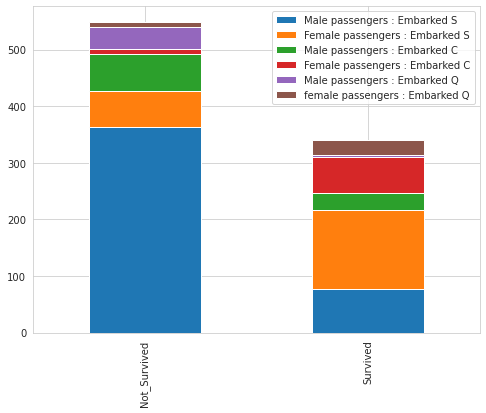

In [68]:
Gender_Embarked[["Not_Survived","Survived"]].T.plot(figsize = (8,6), kind = "bar", stacked = True)

In [69]:
# Survived and Not Survived by Age and Pclass
a = {'Not_Survived':[0],
          'Survived':[0]}
b = {'Not_Survived':[0],
          'Survived':[0]}
c = {'Not_Survived':[0],
          'Survived':[0]}
d = {'Not_Survived':[0],
          'Survived':[0]}
e = {'Not_Survived':[0],
          'Survived':[0]}
f = {'Not_Survived':[0],
          'Survived':[0]}
a=train_df.loc[(train_df['Sex'] == 'female') & (train_df['Pclass'] == 1),'Survived'].value_counts()
#Create the index 
index_ = ['Female passengers : PClass 1'] 
# Set the index 
female_1=pd.DataFrame([a])
female_1.index = index_ 
b=train_df.loc[(train_df['Sex'] == 'female') & (train_df['Pclass'] == 2),'Survived'].value_counts()
#Create the index 
index_ = ['Female passengers : PClass 2'] 
# Set the index 
female_2=pd.DataFrame([b])
female_2.index = index_ 
c=train_df.loc[(train_df['Sex'] == 'female') & (train_df['Pclass'] == 3),'Survived'].value_counts()
#Create the index 
index_ = ['Female passengers : PClass 3'] 
# Set the index 
female_3=pd.DataFrame([c])
female_3.index = index_ 
d=train_df.loc[(train_df['Sex'] == 'male') & (train_df['Pclass'] == 1),'Survived'].value_counts()
#Create the index 
index_ = ['Male passengers : PClass 1'] 
# Set the index 
male_1=pd.DataFrame([d])
male_1.index = index_ 
e=train_df.loc[(train_df['Sex'] == 'male') & (train_df['Pclass'] == 2),'Survived'].value_counts()
#Create the index 
index_ = ['Male passengers : PClass 2'] 
# Set the index 
male_2=pd.DataFrame([e])
male_2.index = index_ 
f=train_df.loc[(train_df['Sex'] == 'male') & (train_df['Pclass'] == 3),'Survived'].value_counts()
#Create the index 
index_ = ['Male passengers : PClass 3'] 
# Set the index 
male_3=pd.DataFrame([f])
male_3.index = index_ 
#male_Q
frames=[male_1,female_1,male_2,female_2,male_1,female_2,male_3,female_3]
result=pd.concat(frames)
Gender_PClass = pd.DataFrame(result)
Gender_PClass

,0,1
Male passengers : PClass 1,77,45
Female passengers : PClass 1,3,91
Male passengers : PClass 2,91,17
Female passengers : PClass 2,6,70
Male passengers : PClass 1,77,45
Female passengers : PClass 2,6,70
Male passengers : PClass 3,300,47
Female passengers : PClass 3,72,72


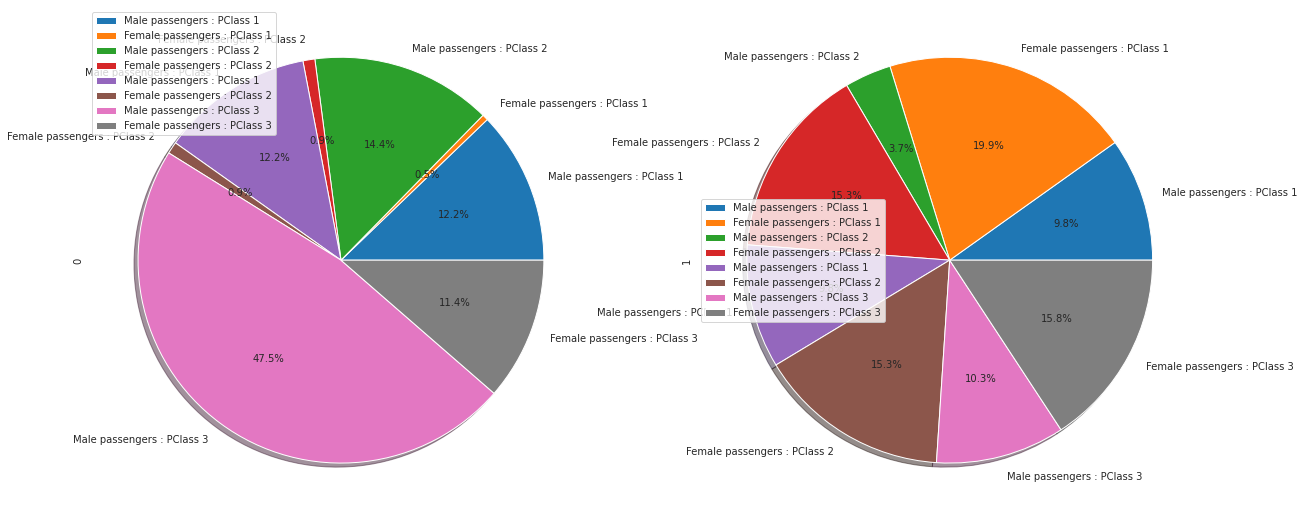

In [70]:
ax2 = Gender_PClass.plot.pie(subplots=True,figsize=(20,20), autopct='%1.1f%%',shadow=True)
plt.legend(loc='center left')
plt.show()

## 4. Feature Engineering

### Steps

1. Testing features.
2. Deciding what features to create.
3. Creating features.
4. Checking how the features work with your model.
5. Improving your features if needed.
6. Create more features until the work is done.

Feature Engineering techniques include imputation, handling outliers, binning, log transform one-hot encoding, grouping operations, feature split, scaling and extracting date.

### Compute Age Bins

In [71]:
train_df['age_bins'] = pd.cut(x = train_df['Age'], bins = 8, labels = False, retbins = False, include_lowest = True)
test_df['age_bins'] = pd.cut(x = test_df['Age'], bins = 8, labels = False, retbins = False, include_lowest = True)

# ageBins = [0, 17, 25, 35, 55, 100]
# fareBins = [0, 10, 20, 30, 40, 51, 512]
# train_df['AgeCat'] = pd.cut(train_df['Age'], ageBins)
# train_df['FareCat'] = pd.cut(train_df['Fare'], fareBins)

### Compute Fare Bins

In [72]:
train_df['Fare_cat']=0
train_df.loc[train_df['Fare']<=7.91,'Fare_cat']=0
train_df.loc[(train_df['Fare']>7.91)&(train_df['Fare']<=14.454),'Fare_cat']=1
train_df.loc[(train_df['Fare']>14.454)&(train_df['Fare']<=31),'Fare_cat']=2
train_df.loc[(train_df['Fare']>31)&(train_df['Fare']<=93.5),'Fare_cat']=3
train_df.loc[(train_df['Fare']>93.5)&(train_df['Fare']<=164.8667),'Fare_cat']=4
train_df.loc[(train_df['Fare']>164.8667)&(train_df['Fare']<=512.3292),'Fare_cat']=5

test_df['Fare_cat']=0
test_df.loc[test_df['Fare']<=7.91,'Fare_cat']=0
test_df.loc[(test_df['Fare']>7.91)&(test_df['Fare']<=14.454),'Fare_cat']=1
test_df.loc[(test_df['Fare']>14.454)&(test_df['Fare']<=31),'Fare_cat']=2
test_df.loc[(test_df['Fare']>31)&(test_df['Fare']<=93.5),'Fare_cat']=3
test_df.loc[(test_df['Fare']>93.5)&(test_df['Fare']<=164.8667),'Fare_cat']=4
test_df.loc[(test_df['Fare']>164.8667)&(test_df['Fare']<=512.3292),'Fare_cat']=5

In [73]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCat,FareCat,age_bins,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(17, 25]","(0, 10]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(35, 55]","(51, 512]",3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(25, 35]","(0, 10]",2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(25, 35]","(51, 512]",3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(25, 35]","(0, 10]",3,1


### Extract Initials from the Name feature. Categorize the Initials by different values

In [74]:
name = train_df['Name']

#Extract the initials
train_df['Title'] = name.str.extract(pat = "(Mr|Master|Mrs|Miss|Major|Rev|Lady|Dr|Mme|Mlle|Col|Capt)\\.")
test_df['Title'] = name.str.extract(pat = "(Mr|Master|Mrs|Miss|Major|Rev|Lady|Dr|Mme|Mlle|Col|Capt)\\.")
train_df['Title'].astype(str)
test_df['Title'].astype(str)

#Assign Rare for the rare initials
train_df.Title[train_df.Title == 'Rev'] = 'Rare'
train_df.Title[train_df.Title == 'Major'] = 'Rare'
train_df.Title[train_df.Title == 'Lady'] = 'Rare'
train_df.Title[train_df.Title == 'Dr'] = 'Rare'
train_df.Title[train_df.Title == 'Mme'] = 'Rare'
train_df.Title[train_df.Title == 'Mlle'] = 'Rare'
train_df.Title[train_df.Title == 'Col'] = 'Rare'
train_df.Title[train_df.Title == 'Capt'] = 'Rare'

test_df.Title[test_df.Title == 'Rev'] = 'Rare'
test_df.Title[test_df.Title == 'Major'] = 'Rare'
test_df.Title[test_df.Title == 'Lady'] = 'Rare'
test_df.Title[test_df.Title == 'Dr'] = 'Rare'
test_df.Title[test_df.Title == 'Mme'] = 'Rare'
test_df.Title[test_df.Title == 'Mlle'] = 'Rare'
test_df.Title[test_df.Title == 'Col'] = 'Rare'
test_df.Title[test_df.Title == 'Capt'] = 'Rare'

# Categorize the Initial
train_df['Title'].replace(['Mr','Mrs','Miss','Master','Rare'],[1,2,3,4,5],inplace=True)
test_df['Title'].replace(['Mr','Mrs','Miss','Master','Rare'],[1,2,3,4,5],inplace=True)
#train_df

# Missing values Imputation
train_df['Title'].fillna(0, inplace = True)
test_df['Title'].fillna(0, inplace = True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [75]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCat,FareCat,age_bins,Fare_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(17, 25]","(0, 10]",2,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(35, 55]","(51, 512]",3,3,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(25, 35]","(0, 10]",2,1,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(25, 35]","(51, 512]",3,3,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(25, 35]","(0, 10]",3,1,1.0


### Categorize sex to numeric variable


In [76]:
train_df['Sex'].replace(['male','female'],[0,1],inplace = True)
test_df['Sex'].replace(['male','female'],[0,1],inplace = True)

### Categorize Embarked to numeric variable


In [77]:
train_df['Embarked'] = train_df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3,'Unknown':0} ).astype(int)
test_df['Embarked'] = test_df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3,'Unknown':0} ).astype(int)

# # Or use one-hot encoding
# features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
# X_concat = pd.get_dummies(X_concat[features])

### Family Size Computation

In [78]:
train_df['Family_Size'] = 0
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch']
train_df['IsAlone'] = 0
train_df.loc[(train_df['Family_Size'] == 1),'IsAlone'] = 1
train_df.loc[(train_df['Family_Size'] == 0) | (train_df['Family_Size'] > 1),'IsAlone'] = 0

test_df['Family_Size'] = 0
test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch']
test_df['IsAlone'] = 0
test_df.loc[(test_df['Family_Size'] == 1),'IsAlone'] = 1
test_df.loc[(test_df['Family_Size'] == 0) | (test_df['Family_Size'] > 1),'IsAlone'] = 0

In [79]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCat,FareCat,age_bins,Fare_cat,Title,Family_Size,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,"(17, 25]","(0, 10]",2,0,1.0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,"(35, 55]","(51, 512]",3,3,2.0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,"(25, 35]","(0, 10]",2,1,3.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,"(25, 35]","(51, 512]",3,3,2.0,1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1,"(25, 35]","(0, 10]",3,1,1.0,0,0


## 5. Feature Selection

Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in.  It is one of the core concepts in machine learning which hugely impacts the performance of the model. Irrelavant or partially relavant features can negatively impact the performance of the model. Feature selection and data cleaning should be the first and most important step of your model designing. 

**Benefits of Feature Selection :**
1. Reduces Overfitting
2. Improves accuracy
3. Reduces training time

**Feature Selection Methods :**
1. Intrinsic
2. Wrapper methods
3. Filter methods

The **intrinsic method** uses an algorithm ExtraTrees classifier. The **Wrapper method** uses techniques such as Forward feature selection, Backward elimination, Recursive feature elimination. The **filter method** is divided into two types. Statistical approach and Feature Importance. The statistical approaches are _**Pearson Coefficient, Spearman Coefficient, ANOVA, Chisquared Test and mutual information test**_. Corelation Heatmap is drawn to identify the feature importances. The **embedded method** is a combination of wrapper and filter methods. The techniques in embedded methods are Ridge regression and Lasso regression.

Good Reference: [How to Choose a Feature Selection Method For Machine Learning](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)

In [80]:
train_df.drop(['AgeCat', 'FareCat'], axis = 1, inplace = True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int64  
 12  age_bins     891 non-null    int64  
 13  Fare_cat     891 non-null    int64  
 14  Title        891 non-null    float64
 15  Family_Size  891 non-null    int64  
 16  IsAlone      891 non-null    int64  
dtypes: float64(3), int64(11), object(3)
memory usage: 118.5+ KB


In [81]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    int64  
 11  age_bins     418 non-null    int64  
 12  Fare_cat     418 non-null    int64  
 13  Title        418 non-null    float64
 14  Family_Size  418 non-null    int64  
 15  IsAlone      418 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 52.4+ KB


### 5.1 Corelation Heatmap
Identify the feature importances

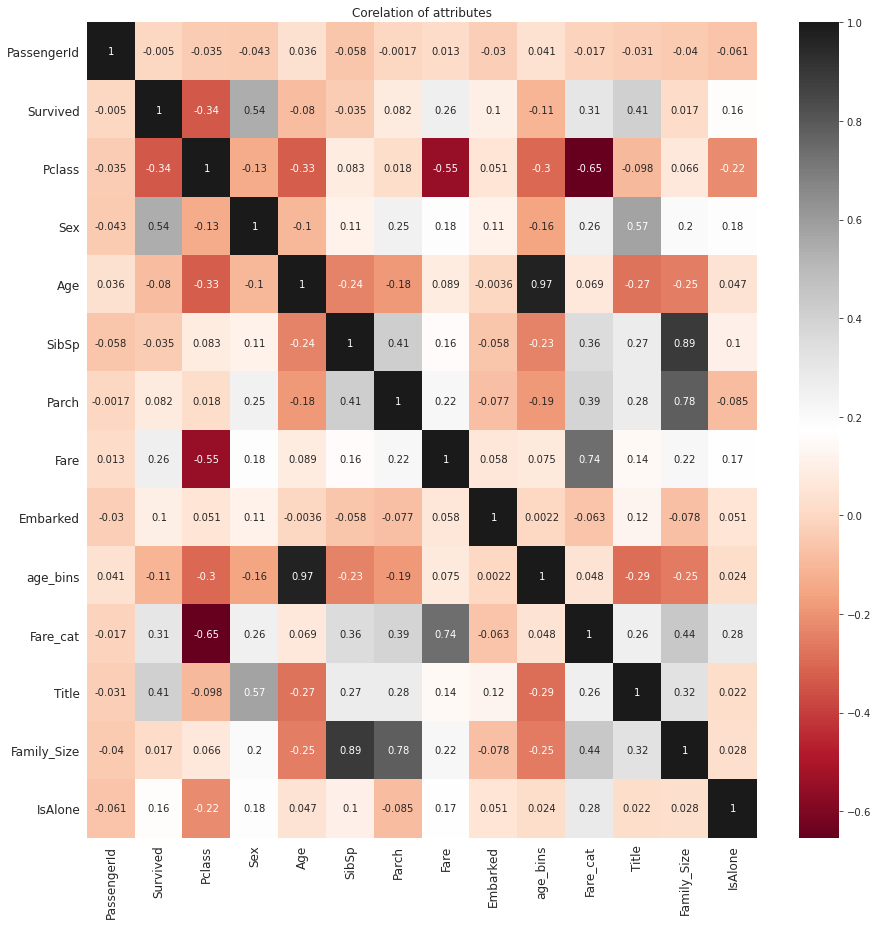

In [82]:
cmp = plt.cm.get_cmap('RdGy')
sns.heatmap(train_df.corr(), annot = True, cmap = cmp).set_title("Corelation of attributes")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

# Automatically ignore 'object' type: Name, Ticket, Cabin
# Darker color implies higher correlation 

### 5.2 ExtraTreeClassifier 
Identify the feature importances

In [83]:
from sklearn.ensemble import ExtraTreesClassifier

In [84]:
# Ignore 'object' type: Name, Ticket, Cabin
y = train_df['Survived'] 
X = train_df.drop(['Survived','Name','Ticket','Cabin'], axis = 1) 

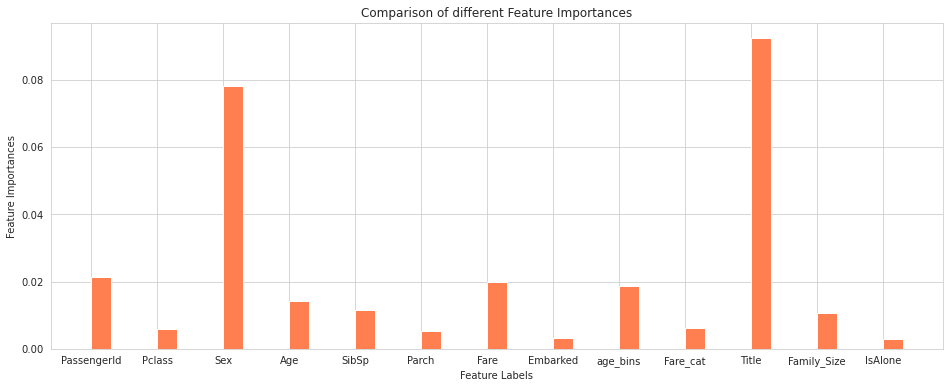

In [85]:
# Building the model 
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 5) 
  
# Training the model 
extra_tree_forest.fit(X, y) 
  
# Computing the importance of each feature 
feature_importance = extra_tree_forest.feature_importances_ 
  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_], axis = 0) 

# Plotting a Bar Graph to compare the models 
plt.figure(figsize = (16,6))
plt.bar(X.columns,feature_importance_normalized,align = 'edge', width = 0.3, color = 'coral') 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 

plt.show() 

### 5.3 Chisquare Test for Feature Selection

In [86]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# Two features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k = 9) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1])

X_kbest_features.shape

Original feature number: 13
Reduced feature number: 9


(891, 9)

In [87]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_bins,Fare_cat,Title,Family_Size,IsAlone
0,1,3,0,22.0,1,0,7.2500,1,2,0,1.0,1,1
1,2,1,1,38.0,1,0,71.2833,2,3,3,2.0,1,1
2,3,3,1,26.0,0,0,7.9250,1,2,1,3.0,0,0
3,4,1,1,35.0,1,0,53.1000,1,3,3,2.0,1,1
4,5,3,0,35.0,0,0,8.0500,1,3,1,1.0,0,0


## 6. Bonus

### 6.1 Random Forest Classification
Information in _Name_ is stored in _Title_ variable.

In [88]:
from sklearn.ensemble import RandomForestClassifier

y = train_df['Survived'] 
X = train_df.drop(['Survived','Name','Ticket','Cabin', 'PassengerId', 'Fare', 'Age'], axis = 1) #  'IsAlone',
X_test  = test_df.drop(['Name','Ticket','Cabin', 'PassengerId', 'Fare', 'Age'], axis = 1) # can make a copy use: .copy() 

X.head()

,Pclass,Sex,SibSp,Parch,Embarked,age_bins,Fare_cat,Title,Family_Size,IsAlone
0,3,0,1,0,1,2,0,1.0,1,1
1,1,1,1,0,2,3,3,2.0,1,1
2,3,1,0,0,1,2,1,3.0,0,0
3,1,1,1,0,1,3,3,2.0,1,1
4,3,0,0,0,1,3,1,1.0,0,0


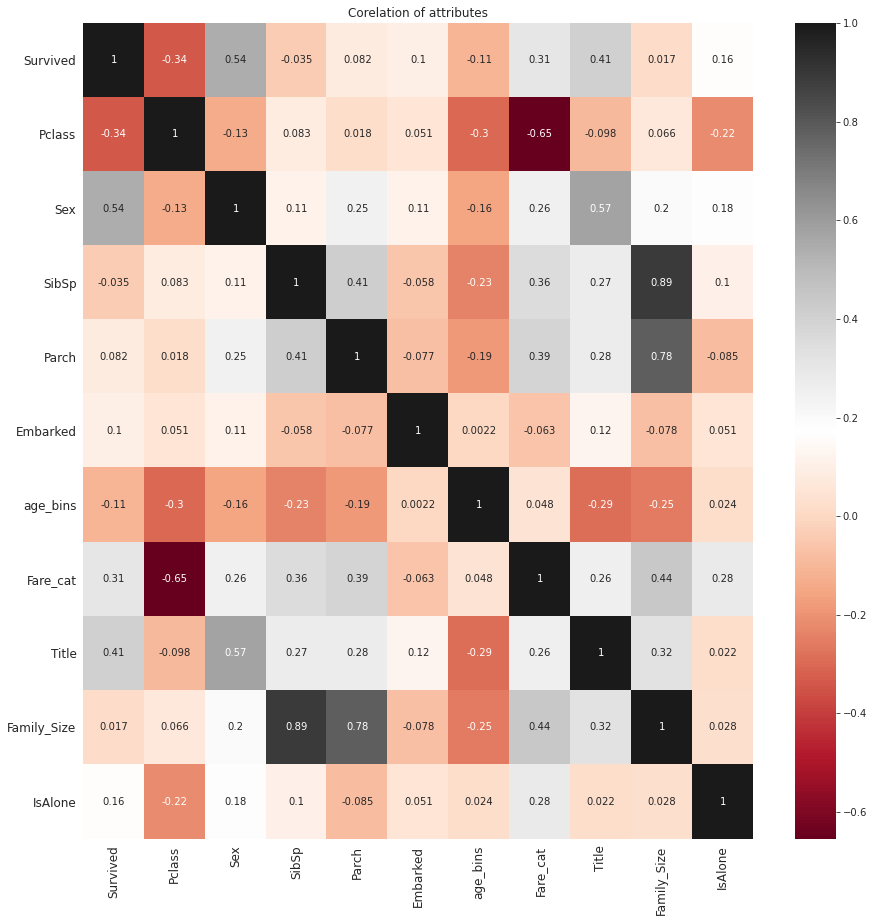

In [89]:
# Heatmap after Feature Selection and dropping columns for prediction

cmp = plt.cm.get_cmap('RdGy')
sns.heatmap(train_df.drop(['Name','Ticket','Cabin', 'PassengerId', 'Fare', 'Age'], axis = 1).corr(), annot = True, cmap = cmp).set_title("Corelation of attributes")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

# Darker color implies higher correlation 

In [90]:
model = RandomForestClassifier(n_estimators = 100) # , max_depth = 6, random_state = 1
model.fit(X, y)
model.score(X, y)

0.9046015712682379

In [91]:
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('mos_submission_rf_2.0.csv', index = False)

In [92]:
# further edit the data and try the result

y = train_df['Survived'] 
X = train_df.drop(['Survived','Name','Ticket','Cabin', 'PassengerId', 'Fare', 'age_bins', 'IsAlone'], axis = 1) 
X_test  = test_df.drop(['Name','Ticket','Cabin', 'PassengerId', 'Fare', 'age_bins', 'IsAlone'], axis = 1) # can make a copy use: .copy() 

model = RandomForestClassifier(n_estimators = 100) # , max_depth = 6, random_state = 1
model.fit(X, y)


predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('mos_submission_rf_3.0.csv', index = False)

model.score(X, y) # may overfit the data

0.9551066217732884

### References


[Pandas fillna](https://blog.csdn.net/weixin_38168620/article/details/79596819)

[Creating Horizontal Bar Charts by group using Pandas](https://mode.com/example-gallery/python_horizontal_bar/)

[Choosing Colormaps in Matplotlib](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

[Specifying Colors in Matplotlib](https://matplotlib.org/tutorials/colors/colors.html)

[Choosing Colormaps in Seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html)

[Complete Guide for Titanic Survival Prediction](https://www.kaggle.com/sherli/complete-guide-for-titanic-survival-prediction)

[Missing Data in NN](https://stackoverflow.com/questions/52570199/multivariate-lstm-with-missing-values)

[How to use Data Scaling Improve Deep Learning Model Stability and Performance](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/)